In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

df = pd.read_csv("/Users/hwang-gyuhan/Desktop/Collage/3-2/딥러닝응용/1주차/abalone.csv", index_col=None)
df["Sex"] = df["Sex"].map({"F": 0, "M": 1, "I": 2})
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Correlation Matrix

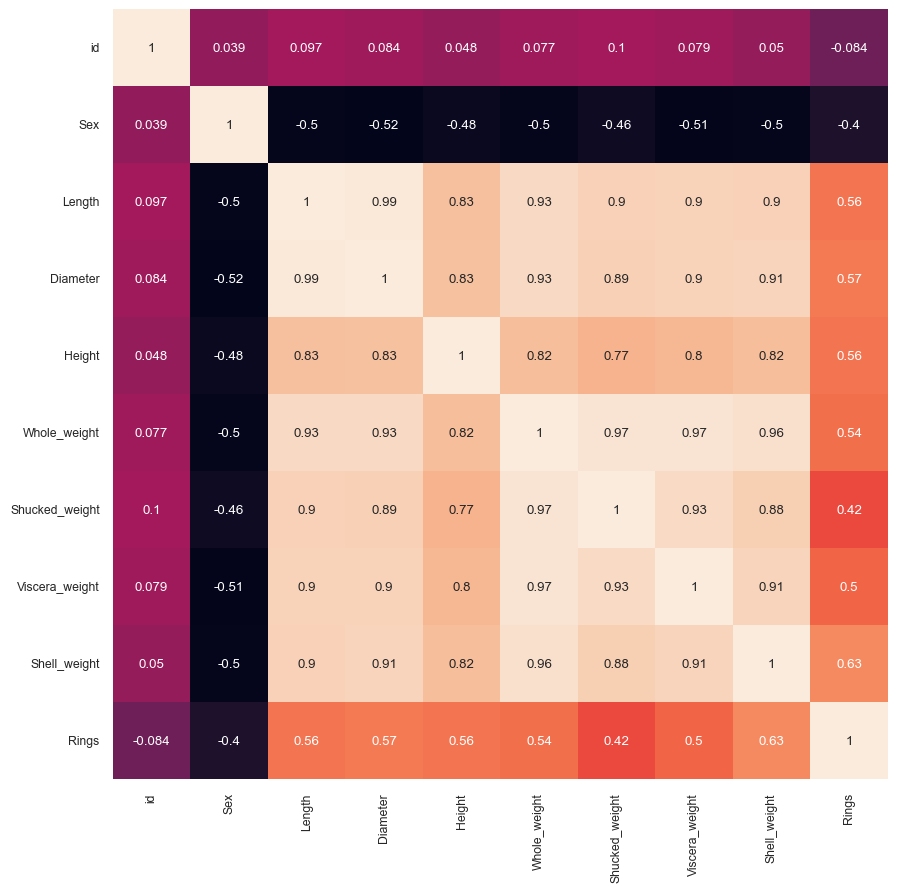

In [3]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [4]:
X = df.drop('Rings', axis=1)
X.head()


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [5]:
y = df['Rings']
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [7]:
X

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [10]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [11]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 9), (3341, 28), (836, 9), (836, 28))

In [12]:
# X는 10열(Rings)을 입력으로, y는 2열(성별)을 타겟으로 설정
X_train = df['Rings'].values.reshape(-1, 1)  # 10열을 입력으로 사용
y_train = df['Sex'].values  # 2열(성별)

# 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # 입력은 Rings 값 하나
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 성별 분류 (F, M, I)

# 모델 컴파일
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # 성별이 one-hot 인코딩 되어 있으면 categorical_crossentropy
              metrics=['accuracy'])

# 모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

loss, acc = model.evaluate(X_train, y_train, verbose=0)

# 최종 정확도 출력
print(f"Test Accuracy: {acc * 100:.2f}%")


Epoch 1/30
105/105 [==============================] - 0s 2ms/step - loss: 1.0900 - accuracy: 0.3711 - val_loss: 1.0842 - val_accuracy: 0.3565
Epoch 2/30
105/105 [==============================] - 0s 791us/step - loss: 1.0561 - accuracy: 0.4244 - val_loss: 1.0816 - val_accuracy: 0.3206
Epoch 3/30
105/105 [==============================] - 0s 1ms/step - loss: 1.0372 - accuracy: 0.4439 - val_loss: 1.0407 - val_accuracy: 0.4330
Epoch 4/30
105/105 [==============================] - 0s 799us/step - loss: 1.0126 - accuracy: 0.4744 - val_loss: 1.0327 - val_accuracy: 0.4952
Epoch 5/30
105/105 [==============================] - 0s 808us/step - loss: 0.9916 - accuracy: 0.4846 - val_loss: 0.9908 - val_accuracy: 0.5299
Epoch 6/30
105/105 [==============================] - 0s 761us/step - loss: 0.9773 - accuracy: 0.4840 - val_loss: 0.9852 - val_accuracy: 0.4928
Epoch 7/30
105/105 [==============================] - 0s 791us/step - loss: 0.9750 - accuracy: 0.4891 - val_loss: 0.9771 - val_accuracy: 0.4

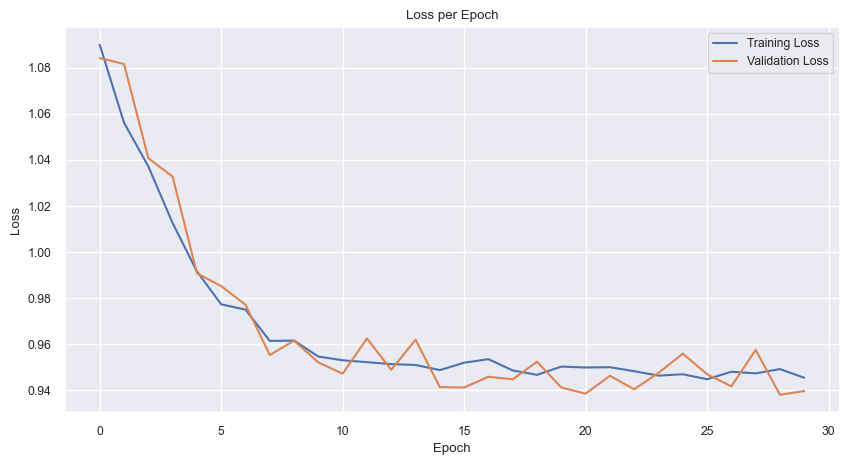

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()